<a href="https://colab.research.google.com/github/Harshi-63/AI-Lab/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install networkx matplotlib fpdf2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 kB 6.3 MB/s eta 0:00:00


Bi-Directional BFS:
  Path: ['A', 'C', 'E', 'F', 'G', 'H', 'I', 'J']
  Time: 0.000129 seconds



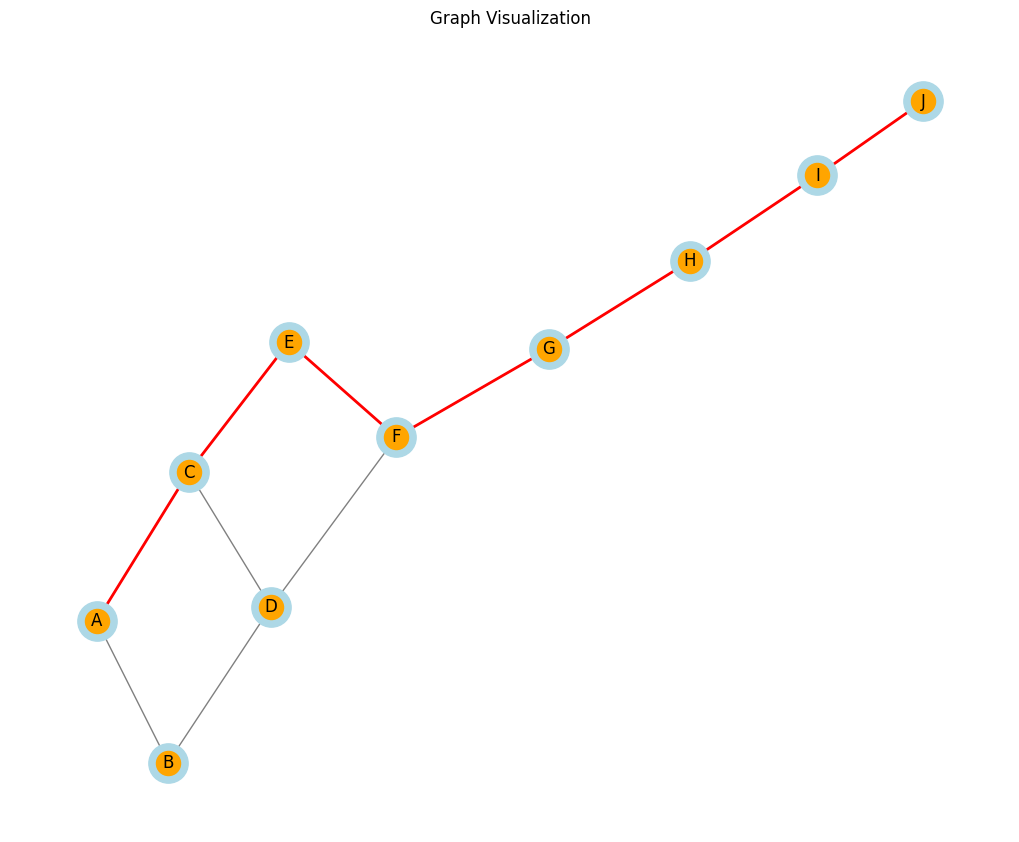

Standard BFS:
  Path: ['A', 'B', 'D', 'F', 'G', 'H', 'I', 'J']
  Time: 0.000039 seconds



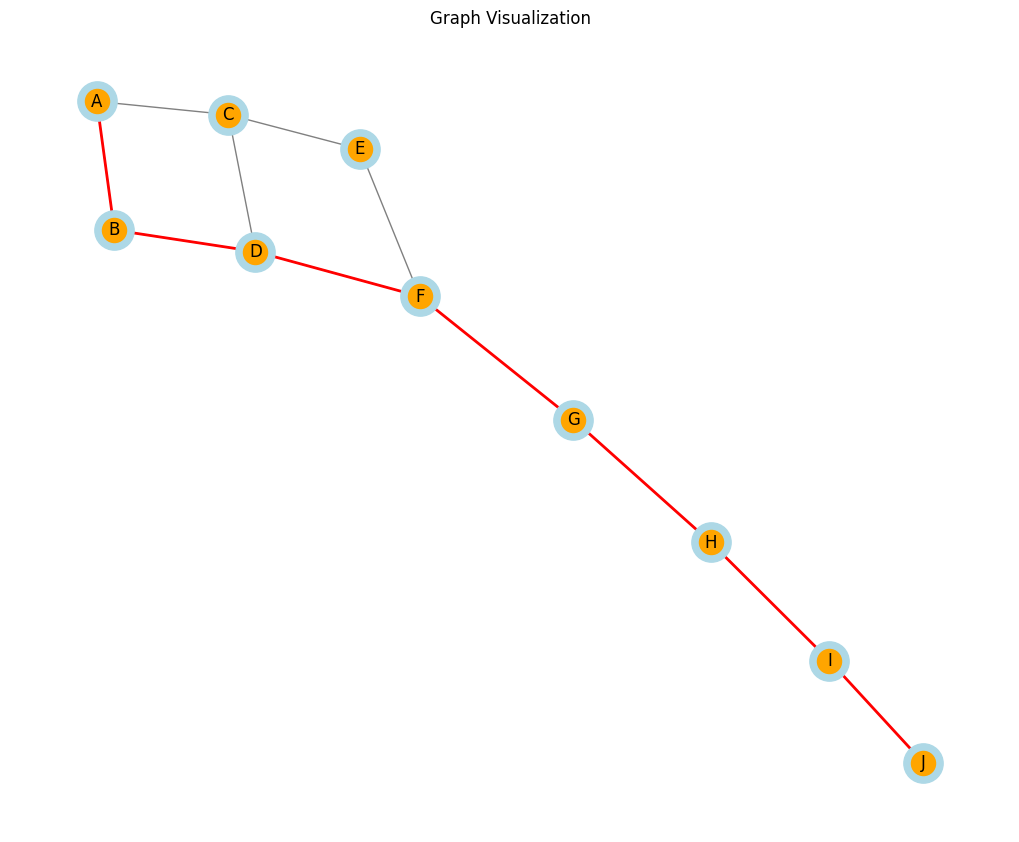

DFS:
  Path: ['A', 'C', 'E', 'F', 'G', 'H', 'I', 'J']
  Time: 0.000043 seconds



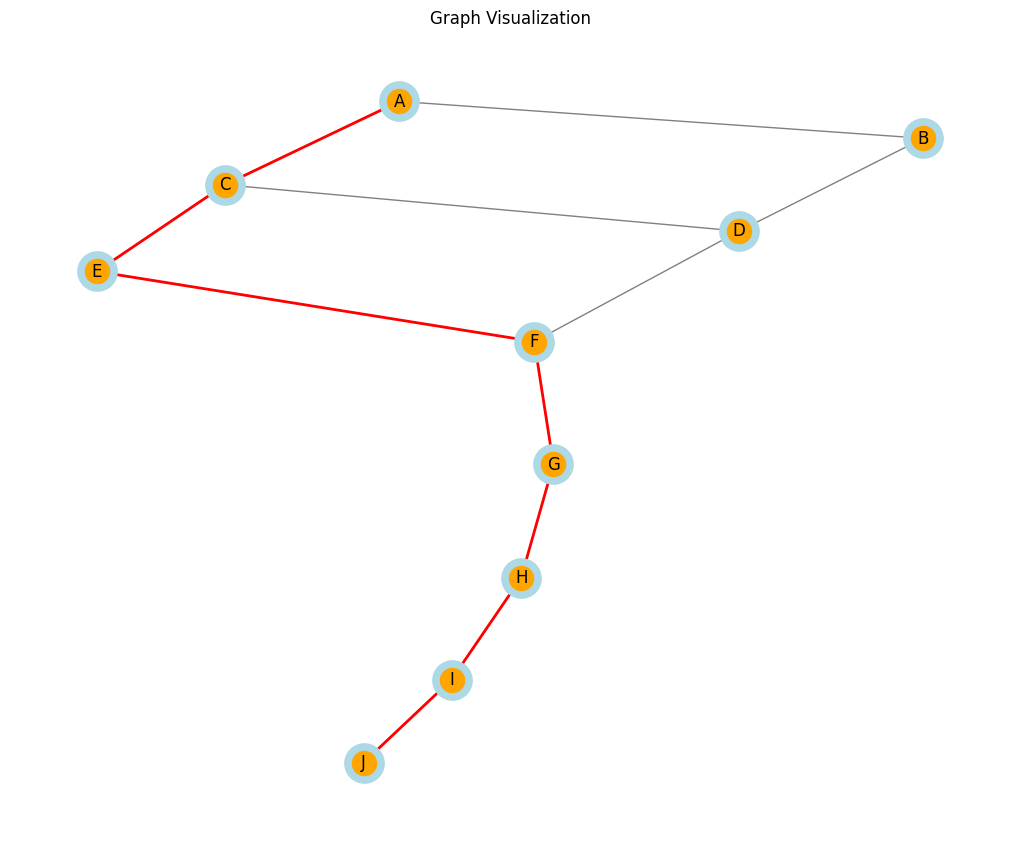

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import time

# Bi-directional BFS
def bidirectional_bfs(graph, start, goal):
    if start == goal:
        return [start]

    front_start = {start}
    front_goal = {goal}
    visited_start = {start: None}
    visited_goal = {goal: None}

    while front_start and front_goal:
        # Expand from the start
        next_front = set()
        for node in front_start:
            for neighbor in graph[node]:
                if neighbor not in visited_start:
                    visited_start[neighbor] = node
                    next_front.add(neighbor)
                    if neighbor in visited_goal:
                        return reconstruct_path(visited_start, visited_goal, neighbor)
        front_start = next_front

        # Expand from the goal
        next_front = set()
        for node in front_goal:
            for neighbor in graph[node]:
                if neighbor not in visited_goal:
                    visited_goal[neighbor] = node
                    next_front.add(neighbor)
                    if neighbor in visited_start:
                        return reconstruct_path(visited_start, visited_goal, neighbor)
        front_goal = next_front

    return None  # No path found


def reconstruct_path(visited_start, visited_goal, meeting_point):
    path = []
    node = meeting_point
    while node is not None:
        path.append(node)
        node = visited_start[node]
    path.reverse()
    node = visited_goal[meeting_point]
    while node is not None:
        path.append(node)
        node = visited_goal[node]
    return path


# Standard BFS
def bfs(graph, start, goal):
    queue = [start]
    visited = {start: None}

    while queue:
        current = queue.pop(0)
        if current == goal:
            return reconstruct_single_path(visited, start, goal)

        for neighbor in graph[current]:
            if neighbor not in visited:
                visited[neighbor] = current
                queue.append(neighbor)
    return None


# Standard DFS
def dfs(graph, start, goal):
    stack = [start]
    visited = {start: None}

    while stack:
        current = stack.pop()
        if current == goal:
            return reconstruct_single_path(visited, start, goal)

        for neighbor in graph[current]:
            if neighbor not in visited:
                visited[neighbor] = current
                stack.append(neighbor)
    return None


def reconstruct_single_path(visited, start, goal):
    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = visited[node]
    path.reverse()
    return path


# Visualization
def visualize(graph, path, explored_nodes):
    pos = nx.spring_layout(graph)  # Positions for nodes
    plt.figure(figsize=(10, 8))

    # Draw the entire graph
    nx.draw(graph, pos, with_labels=True, node_color="lightblue", node_size=800, edge_color="gray")

    # Highlight explored nodes
    nx.draw_networkx_nodes(graph, pos, nodelist=explored_nodes, node_color="orange")

    # Highlight the path
    if path:
        edges_in_path = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=edges_in_path, edge_color="red", width=2)

    plt.title("Graph Visualization")
    plt.show()


# Main Code
if __name__ == "__main__":
    # Create a sample graph
    G = nx.Graph()
    G.add_edges_from([
        ('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'),
        ('C', 'E'), ('D', 'F'), ('E', 'F'), ('F', 'G'),
        ('G', 'H'), ('H', 'I'), ('I', 'J')
    ])

    start, goal = 'A', 'J'

    # Compare algorithms
    algorithms = [("Bi-Directional BFS", bidirectional_bfs), ("Standard BFS", bfs), ("DFS", dfs)]
    for name, algo in algorithms:
        start_time = time.time()
        path = algo(G, start, goal)
        elapsed = time.time() - start_time

        print(f"{name}:")
        print(f"  Path: {path}")
        print(f"  Time: {elapsed:.6f} seconds\n")

        # Visualize the graph with the path
        if path:
            visualize(G, path, list(G.nodes))